<a href="https://colab.research.google.com/github/atomashevic/transforEmotion-notebook/blob/main/transforEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## transforEmotion setup

In [11]:
install.packages("transforEmotion")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
library(transforEmotion)

## Sentiment analysis

In [13]:
text <- "So even though we face the difficulties of today and tomorrow,
 I still have a dream. It is a dream deeply rooted in the American dream.
 I have a dream that one day this nation will rise up and live out the
 true meaning of its creed: We hold these truths to be self-evident,
 that all men are created equal."

emotions <- c("anger", "fear", "joy", "sadness", "optimism",
              "hope", "surprise", "disgust")

# Run analysis with default DistilRoBERTa model (fast and efficient)
results <- transformer_scores(
  text = text,
  classes = emotions,
  transformer = "facebook-bart"
)

print(results)

Obtaining scores...



$...
     anger       fear        joy    sadness   optimism       hope   surprise 
0.02218537 0.02566762 0.07231971 0.02939544 0.27891979 0.44480541 0.12020794 
   disgust 
0.00649865 



## Image and Video

In [ ]:
# Load images from package data
img1_path <- system.file("extdata",
                         "trump1.jpg",
                          package = "transforEmotion")
img2_path <- system.file("extdata",
                         "trump2.jpg",
                          package = "transforEmotion")

# Define emotion categories to analyze
emotions <- c("anger", "fear", "disgust", "sadness",
             "optimism", "hope", "surprise")

# Analyze the image
result_first <- image_scores(
  image = img1_path,        # Path to first portrait
  classes = emotions        # Emotions to detect
)

result_second <- image_scores(
  image = img2_path,       # Path to second portrait
  classes = emotions        # Emotions to detect
)

Using registered model: OpenAI CLIP ViT-Base/32 - General purpose vision-language model

Using registered model: OpenAI CLIP ViT-Base/32 - General purpose vision-language model



In [ ]:
# First portrait

round(result_first,2)

anger,fear,disgust,sadness,optimism,hope,surprise
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.09,0.08,0.07,0.02,0.17,0.33,0.24


In [ ]:
# Second portrait

round(result_second,2)

anger,fear,disgust,sadness,optimism,hope,surprise
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.53,0.17,0.22,0.01,0,0.04,0.02


### Video example

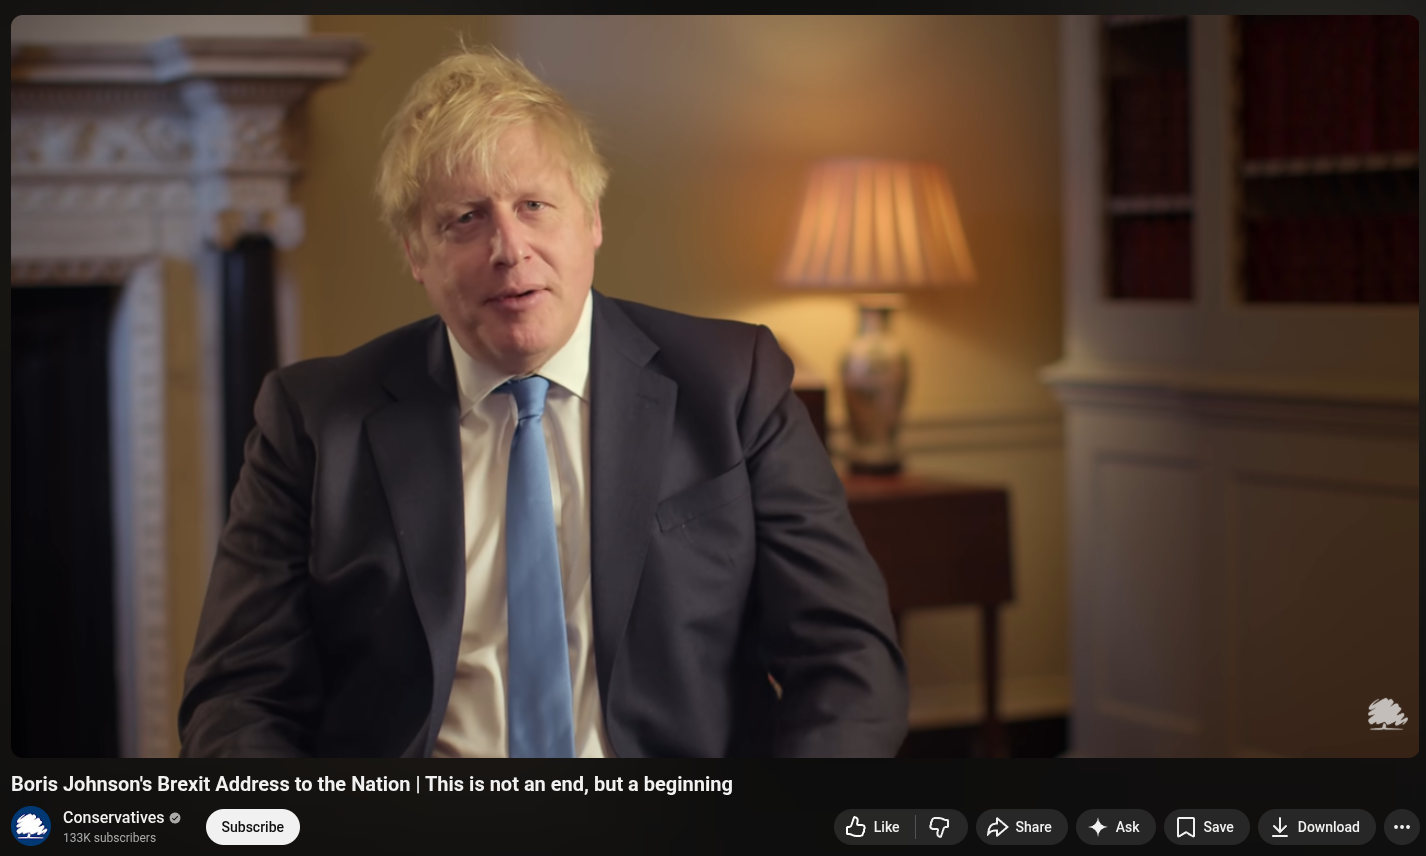



In [ ]:
video_url <- "https://www.youtube.com/watch?v=hdYNcv-chgY"

# Define emotion categories
emotions <- c("excitement", "happiness", "pride",
              "anger", "fear", "sadness", "neutral")

# Extract and analyze 20 frames from the video
video_results <- video_scores(
  video = video_url,  # Can be YouTube URL or local file path
  classes = emotions,
  nframes = 20,           # Number of frames to extract
  save_video = TRUE,      # Option to save processed video
  save_frames = TRUE,     # Option to save individual frames
  video_name = 'political_speech',
  start = 30,             # Start at 30 seconds into video
  end = 120,              # End at 2 minutes
  model = "oai-base"     # Using the larger CLIP model for accuracy
)

# Show few rows of resulting dataframe
head(video_results)

Using registered model: OpenAI CLIP ViT-Base/32 - General purpose vision-language model



,excitement,happiness,pride,anger,fear,sadness,neutral
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09525338,0.007753692,0.05586397,0.2425399,0.3134290,0.16664357,0.11851650
2,0.13144474,0.010481941,0.07921430,0.2768249,0.2658505,0.11340823,0.12277541
3,0.09972992,0.003908183,0.02883172,0.5595016,0.2099132,0.05937271,0.03874259
4,0.08172962,0.006121764,0.06029894,0.3625411,0.2464208,0.13677663,0.10611110
5,0.09101269,0.008388780,0.07647317,0.3060616,0.2620842,0.15706576,0.09891381
6,0.08509775,0.004757542,0.05921413,0.2802029,0.2646918,0.13929482,0.16674109


In [ ]:
video_results

excitement,happiness,pride,anger,fear,sadness,neutral
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.09525338,0.007753692,0.05586397,0.2425399,0.3134290,0.16664357,0.11851650
0.13144474,0.010481941,0.07921430,0.2768249,0.2658505,0.11340823,0.12277541
0.09972992,0.003908183,0.02883172,0.5595016,0.2099132,0.05937271,0.03874259
0.08172962,0.006121764,0.06029894,0.3625411,0.2464208,0.13677663,0.10611110
0.09101269,0.008388780,0.07647317,0.3060616,0.2620842,0.15706576,0.09891381
0.08509775,0.004757542,0.05921413,0.2802029,0.2646918,0.13929482,0.16674109
0.10903576,0.007241474,0.06157625,0.2693770,0.2572488,0.13674113,0.15877958
0.08454189,0.005289726,0.04713387,0.3474620,0.2539809,0.11770233,0.14388934
0.10996560,0.009144485,0.06382616,0.2448173,0.2630371,0.16222349,0.14698586


## RAG

In [ ]:
query <- paste(
  "Which of the following emotions is most prominently expressed in this political speech?",
  "Pick one of these labels:", paste(emotions, collapse = ", "), "Explain why."
)

rag_result <- rag(
  text = text,
  query = query,
  prompt = "You are an expert in emotion recognition.",
  # transformer = "LLAMA-2"
)

Warning message:
“Structured outputs (json/table/csv) are supported only for Gemma3-1B and Gemma3-4B. Falling back to output = 'text'.”
Warning message in system2(python, args, stdout = TRUE):
“running command ''/root/.cache/uv/archive-v0/VSJti2Xe2Vk-Yum45zxXg/bin/python' -m pip freeze' had status 1”
Using device: cpu

Analyzing documents individually...

Per-document analysis completed in 3s



In [ ]:
rag_result

Document 1: The emotions most prominently expressed in this political speech are excitement, happiness, pride, and anger. These emotions are present in the speech due to the speaker's passionate and enthusiastic delivery, as well as the rousing call to action. The audience is encouraged to join the movement for change and to rise up and live out the true meaning of the American dream. The use of these emotions in the speech highlights the importance of the American dream and the need for individuals to strive for greater opportunities and success.